In [1]:
import TestFunctions as tf
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from importlib import reload
import random as r
import time
import matplotlib.animation as animation

In [2]:
class Solution:
    def __init__(self, dimension, lower_bound, upper_bound):
        self.d = dimension
        self.lower = lower_bound # we will use the same bounds for all parameters
        self.upper = upper_bound
        self.params = np.zeros(self.d) #solution parameters
        self.f = np.inf # objective function evaluation

In [3]:
def HillClimb(solution, func):
    for i in range(0,len(solution.params)):
        solution.params[i] = r.uniform(solution.lower, solution.upper) # Generate random coordinates for the first time
    z = func(tuple(i for i in solution.params)) # Get value of function in generated point on graph
    minZ = z
    bestParams = solution.params.copy()
    k = 0
    standardDeviation = 2 # For normal distribution of data, values within standard deviation of 2 account for about 95% of values 
    snaps = []
    snaps.append((solution.params.copy()[0], solution.params.copy()[1], z)) # Save first point
    while k != 1000:# Stop generation of new points when function value hasnt improved in 1000 tries
        for i in range(0,len(solution.params)):
            solution.params[i] = np.random.normal(bestParams[i], standardDeviation)# generate neighbor based on current solution
        z = func(tuple(i for i in solution.params))
        k += 1
        if minZ > z:
            minZ = z
            bestParams = solution.params.copy()
            snaps.append((solution.params.copy()[0], solution.params.copy()[1], z))
            k = 0
    print(bestParams)
    solution.params = bestParams
    return (solution,snaps)# Return tuple with solution at index [0] and list of coordinates (x,y,z) for points at index [1]

In [27]:
def plot3DWithAnimation(xRangeMin, xRangeMax, yRangeMin, yRangeMax, func, params, gifName):
    x = np.linspace(xRangeMin, xRangeMax, 30)
    y = np.linspace(yRangeMin, yRangeMax, 30)
    #x = np.concatenate((x[x<0], [0], x[x>0]))#insert [0,0], doesnt work neither
    #y = np.concatenate((y[y<0], [0], y[y>0]))
    X, Y = np.meshgrid(x, y)
    Z = func((X, Y))
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='magma', edgecolor='none', zorder=1, alpha=0.4)
    ax.set_title(func.__name__)
    ax.set_zlim(0, Z.max())
    scatter = ax.scatter([], [], [], color='red', s=100, zorder=4)  # Placeholder for the scatter plot
    # Function thats gonna be called by FuncAnimation at every interval
    def animate(i):
        x = [params[i][0]]  
        y = [params[i][1]]  
        z = [params[i][2]]
        scatter._offsets3d = (x, y, z)  # Update the scatter plot data
        plt.pause(1) # Pause plotting for smoother animation
    ani = animation.FuncAnimation(fig, animate, repeat=True, frames=len(params), interval=1000) # Generate animation
    
    writer = animation.PillowWriter(fps=1, metadata=dict(artist='Me'), bitrate=1800)
    ani.save(gifName, writer=writer) # Save animation -> plt.show() of Gif seems to display just one frame in Jupyter notebook, viewing gif file seperately shows entire animation
    
    plt.show()

[-0.0162358   0.07931417]


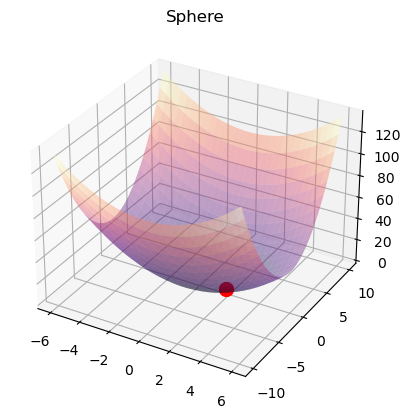

In [29]:
funcs = tf.getAllFunctions()
x = Solution(2,funcs[0][1],funcs[0][0])
func = funcs[0][4]
result = HillClimb(x,func)
x = result[0]
func = funcs[0]
params = result[1]
plot3DWithAnimation(func[0],func[1],func[2],func[3],func[4],params,'SphereHillClimb.gif')

In [30]:
params

[(3.058849661435236, -3.904030416764361, 24.598014746283766),
 (3.2375120121869965, -2.067978987835577, 14.758021123184552),
 (2.2814397864170988, -2.733989793941179, 12.679667692421425),
 (2.462799591129909, -2.465660471491213, 12.144863386743918),
 (0.4616665326801943, -0.7895805813513652, 0.8365734818441128),
 (-0.19325798763135793, 0.506535030892256, 0.2939263873043409),
 (-0.40804769323870727, 0.3423716099238304, 0.2837212392392656),
 (0.22157754851983313, -0.31235180646358585, 0.14666026100912438),
 (0.01562550333270682, 0.1843058134984656, 0.03421278924373161),
 (-0.016235801861820498, 0.07931417182505641, 0.006554339114390867)]

[ 0.00995312 -0.03410262]


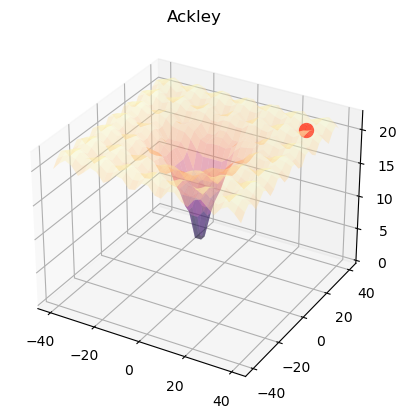

In [28]:
funcs = tf.getAllFunctions()
x = Solution(2,funcs[1][1],funcs[1][0])
func = funcs[1][4]
result = HillClimb(x,func)
x = result[0]
func = funcs[1]
params = result[1]
plot3DWithAnimation(func[0],func[1],func[2],func[3],func[4],params,'AckleyHillClimb.gif')

In [31]:
params

[(3.058849661435236, -3.904030416764361, 24.598014746283766),
 (3.2375120121869965, -2.067978987835577, 14.758021123184552),
 (2.2814397864170988, -2.733989793941179, 12.679667692421425),
 (2.462799591129909, -2.465660471491213, 12.144863386743918),
 (0.4616665326801943, -0.7895805813513652, 0.8365734818441128),
 (-0.19325798763135793, 0.506535030892256, 0.2939263873043409),
 (-0.40804769323870727, 0.3423716099238304, 0.2837212392392656),
 (0.22157754851983313, -0.31235180646358585, 0.14666026100912438),
 (0.01562550333270682, 0.1843058134984656, 0.03421278924373161),
 (-0.016235801861820498, 0.07931417182505641, 0.006554339114390867)]